## CVU Open and Reproducible Research Computing (Fall 2022)

### Assignment Notebook: Time Series Analysis

#### 1. Install the `bmi_nwis` library (if it's not installed already)

In [ ]:
#pip install bmi_nwis

#### 2. Import the libraries required for the assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataretrieval.nwis as nwis

output_pkl_file = 'streamflow_data_'

#### 3a. Choose one of the following USGS stream gages to analyze

Uncomment __one__ of the following `site_id` variable declarations. Leave `my_start_date` and `my_end_date` unchanged. All of the sites below have at least 40 years of record. Only the Cache la Poudre has less than 50. 

In [2]:
site_id = '13185000' # Boise River at Twin Springs
# site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
# site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start_date = '1970-10-01'
my_end_date = '2020-09-30'

#### 4. Get the Flow Data

In [3]:
df_flow = nwis.get_record(sites=site_id, service='dv', 
                          start=my_start_date, end=my_end_date)
df_flow

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,378.0,A
1970-10-02 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,375.0,A
1970-10-03 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,373.0,A
1970-10-04 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,369.0,A
1970-10-05 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,367.0,A
...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,407.0,A
2020-09-27 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,417.0,A
2020-09-28 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,377.0,A


#### 5. Plot the Data

Text(0, 0.5, 'Discharge (ft${}^3$/s)')

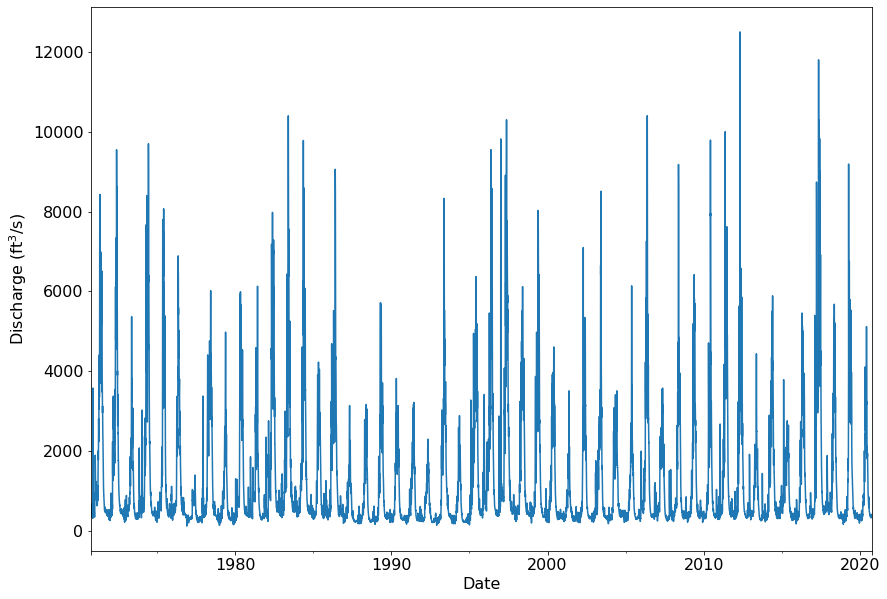

In [4]:
plt.rcParams.update({'font.size': 16})

ax1 = df_flow['00060_Mean'].plot(x='datetime', figsize=(14,10))

ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (ft${}^3$/s)')

#### 6. Wrangle the Data into a `pandas` DataFrame object

Steps: 
* Get the dates and streamflow out of the object returned by our call to `Nwis.nwis()`
* Convert the streamflow in ft${}^3$/s to m${}^3$/s
* Create a water year vector so we can analyze data by water year
* Create a `pandas.DataFrame()` with the data

In [6]:
# Get the dates and convert them to a Pandas datetime object
dates = df_flow.index
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = df_flow['00060_Mean'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = df_flow.index.year.values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? 
df.to_pickle(output_pkl_file+site_id+'.pkl')

# Show the dataframe we've created
df

,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01 00:00:00+00:00,1970-10-01 00:00:00+00:00,1971,378.0,10.704158
1970-10-02 00:00:00+00:00,1970-10-02 00:00:00+00:00,1971,375.0,10.619205
1970-10-03 00:00:00+00:00,1970-10-03 00:00:00+00:00,1971,373.0,10.562569
1970-10-04 00:00:00+00:00,1970-10-04 00:00:00+00:00,1971,369.0,10.449298
1970-10-05 00:00:00+00:00,1970-10-05 00:00:00+00:00,1971,367.0,10.392662
...,...,...,...,...
2020-09-26 00:00:00+00:00,2020-09-26 00:00:00+00:00,2020,407.0,11.525377
2020-09-27 00:00:00+00:00,2020-09-27 00:00:00+00:00,2020,417.0,11.808556
2020-09-28 00:00:00+00:00,2020-09-28 00:00:00+00:00,2020,377.0,10.675841


#### 7. Compute the Seasonal Cycle and Plot

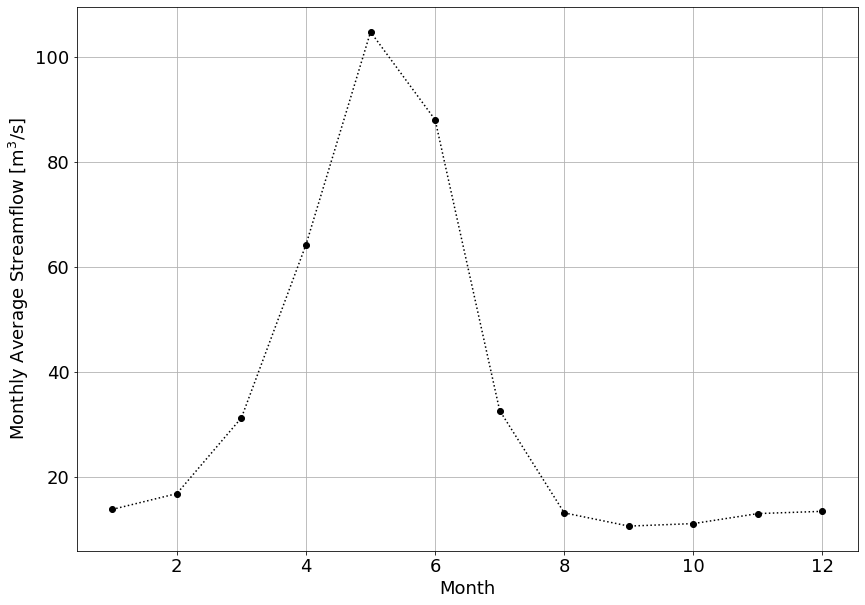

In [7]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

## Instructions
---

1. Download this notebook into the folder for your repository for this module by opening a terminal window, navigating to your repository folder and issuing the command `curl -OL https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb`. Or, [click on this link](https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb) and save the page to your local repository.  
2. Verify that the notebook runs to this point 
3. Go back and change the `site_id` variable to a gage of your choosing by commenting out the current gage selected and uncommenting the gage you would like to investigate. Then in the Jupyter Lab menu go to "Kernel > Restart Kernel and Clear All Outputs" and click "Restart" when prompted
4. Re-run the notebook to this point
5. Now group the streamflow data by `WaterYear` and get the maximum streamflow value for each Water Year. You will need to use the `.groupby()` followed by the `.max()` methods. This should be very similar to the commands used to find the seasonal cycle above, but be sure to make sure to group by Water Year! Store the output of that operation in a variable called `Q_ams`. Print the output of `Q_ams` to see which years were associated with the lowest 5 and highest 5 annual maximum streamflows. __Note:__ See this [DataFrame.groupby()](https://www.geeksforgeeks.org/pandas-groupby/) and [DataFrame.max()](https://www.geeksforgeeks.org/python-pandas-dataframe-max/) documentation for help. 
6. Now sort the annual maximum series in ___descending order___ using the `.sort_values()` method. Use the `.values` to save these values to a numpy array. __Note:__ See this [DataFrame.sort_values()](https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/) and [DataFrame.values](https://www.geeksforgeeks.org/python-pandas-dataframe-values/) documentation for help. 
7. Compute the Weibull plotting position value for each streamflow value. The Weibull series is calculated using the formula:

    $$
    p_i = \frac{r_i}{n+1},
    $$

    where $r_i$ is the rank of the $i$th observation, $n$ is the number of annual maximum observations, and $p_i$ is the exceedance probability. Use the numpy command `np.arange()` method and the `.size` attribute on your annual maximum series array to create an array of ranks associated with each annual maximum value.
8. Create a presentation quality plot showing the annual maximum streamflows on the x-axis and the exceedance probability on the y axis. __Note:__ See this [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and [numpy.size()](https://numpy.org/doc/stable/reference/generated/numpy.broadcast.size.html) documentation for help. 
9. The $T$-year recurrence interval is associated with an exceedance probability of $p$ which is calculated using:

    $$ 
    p = \frac{1}{T} 
    $$

    Calculate the values of the 20- and 50- year recurrence interval events directly from the Weibull plotting position values by using the numpy `np.interp()` function, which does a very basic interpolation (there are more sophisticated ones, but this is sufficient for now). __Note:__ See this [numpy.interp()](https://www.geeksforgeeks.org/numpy-interp-function-python/) documentation for help.  

In [15]:
Q_ams = df['Discharge_cms'].groupby(by=WY).max()
Q_ams

1971    238.719725
1972    270.435750
1973    152.067014
1974    274.683432
1975    228.525288
1976    195.110191
1977     39.645031
1978    170.473635
1979    141.023040
1980    169.624099
1981    173.588602
1982    225.976679
1983    294.505948
1984    276.948863
1985    119.784631
1986    256.559989
1987     88.918142
1988     89.767678
1989    161.978271
1990    108.174300
1991     91.183572
1992     65.131123
1993    235.887937
1994     81.838672
1995    180.384893
1996    270.435750
1997    291.674160
1998    173.305423
1999    227.392573
2000    130.545425
2001     99.395757
2002    201.056945
2003    240.985156
2004     99.395757
2005    173.871781
2006    294.505948
2007    101.378009
2008    259.958135
2009    181.800787
2010    277.232041
2011    283.178796
2012    353.973495
2013    125.731385
2014    166.792311
2015    107.324764
2016    154.615623
2017    334.150979
2018    160.845556
2019    260.241314
2020    144.987544
Name: Discharge_cms, dtype: float64

In [16]:
Q_ams_5largest = df['Discharge_cms'].groupby(by=WY).max().nlargest(n=5)
Q_ams_5smallest = df['Discharge_cms'].groupby(by=WY).max().nsmallest(n=5)
"Five largest Maxima", Q_ams_5largest,"Five smallest Maxima", Q_ams_5smallest

('Five largest Maxima',
 2012    353.973495
 2017    334.150979
 1983    294.505948
 2006    294.505948
 1997    291.674160
 Name: Discharge_cms, dtype: float64,
 'Five smallest Maxima',
 1977    39.645031
 1992    65.131123
 1994    81.838672
 1987    88.918142
 1988    89.767678
 Name: Discharge_cms, dtype: float64)

In [18]:
Q_ams_sort = Q_ams.sort_values(ascending = False)
Q_ams_sort

2012    353.973495
2017    334.150979
2006    294.505948
1983    294.505948
1997    291.674160
2011    283.178796
2010    277.232041
1984    276.948863
1974    274.683432
1996    270.435750
1972    270.435750
2019    260.241314
2008    259.958135
1986    256.559989
2003    240.985156
1971    238.719725
1993    235.887937
1975    228.525288
1999    227.392573
1982    225.976679
2002    201.056945
1976    195.110191
2009    181.800787
1995    180.384893
2005    173.871781
1981    173.588602
1998    173.305423
1978    170.473635
1980    169.624099
2014    166.792311
1989    161.978271
2018    160.845556
2016    154.615623
1973    152.067014
2020    144.987544
1979    141.023040
2000    130.545425
2013    125.731385
1985    119.784631
1990    108.174300
2015    107.324764
2007    101.378009
2004     99.395757
2001     99.395757
1991     91.183572
1988     89.767678
1987     88.918142
1994     81.838672
1992     65.131123
1977     39.645031
Name: Discharge_cms, dtype: float64

In [19]:
Q_ams_sort = Q_ams_sort.values
Q_ams_sort

array([353.9734952 , 334.15097947, 294.505948  , 294.505948  ,
       291.67416004, 283.17879616, 277.23204144, 276.94886264,
       274.68343227, 270.43575033, 270.43575033, 260.24131367,
       259.95813487, 256.55998932, 240.98515553, 238.71972516,
       235.8879372 , 228.5252885 , 227.39257331, 225.97667933,
       201.05694527, 195.11019055, 181.80078713, 180.38489315,
       173.87178084, 173.58860204, 173.30542325, 170.47363529,
       169.6240989 , 166.79231094, 161.9782714 , 160.84555622,
       154.6156227 , 152.06701354, 144.98754363, 141.02304049,
       130.54542503, 125.73138549, 119.78463077, 108.17430013,
       107.32476374, 101.37800902,  99.39575745,  99.39575745,
        91.18357236,  89.76767838,  88.91814199,  81.83867209,
        65.13112312,  39.64503146])

In [20]:
p_ams = np.arange(Q_ams.size) / (Q_ams.size + 1)
p_ams 

array([0.        , 0.01960784, 0.03921569, 0.05882353, 0.07843137,
       0.09803922, 0.11764706, 0.1372549 , 0.15686275, 0.17647059,
       0.19607843, 0.21568627, 0.23529412, 0.25490196, 0.2745098 ,
       0.29411765, 0.31372549, 0.33333333, 0.35294118, 0.37254902,
       0.39215686, 0.41176471, 0.43137255, 0.45098039, 0.47058824,
       0.49019608, 0.50980392, 0.52941176, 0.54901961, 0.56862745,
       0.58823529, 0.60784314, 0.62745098, 0.64705882, 0.66666667,
       0.68627451, 0.70588235, 0.7254902 , 0.74509804, 0.76470588,
       0.78431373, 0.80392157, 0.82352941, 0.84313725, 0.8627451 ,
       0.88235294, 0.90196078, 0.92156863, 0.94117647, 0.96078431])

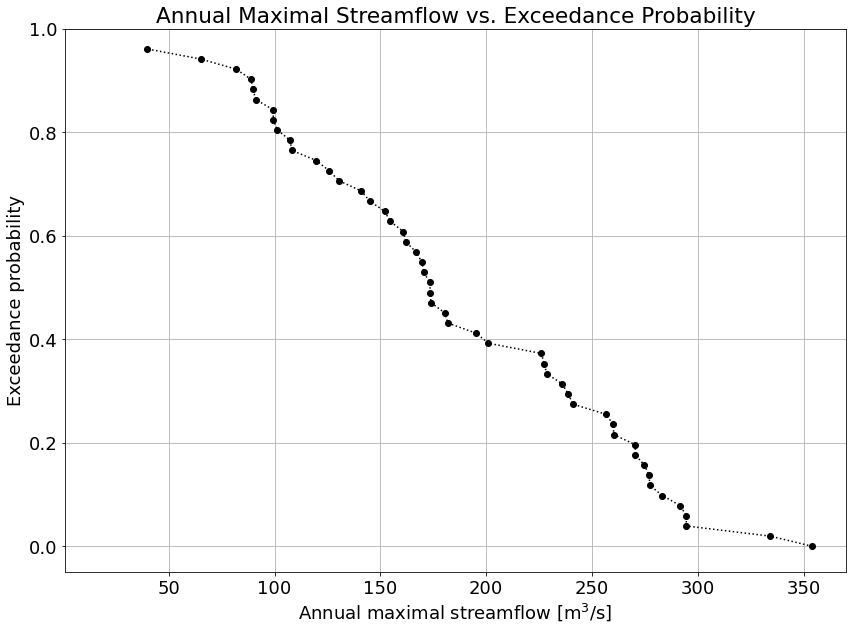

In [24]:
# Create a pandas DataFrame from these variables
sp = pd.DataFrame()
sp['Annual maximal streamflow'] = Q_ams_sort
sp['Exceedance probability'] = p_ams

#sp.plot(x='Annual maximal streamflow', y='Exceedance probability')

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.plot(Q_ams_sort, p_ams,'ko:')
plt.title('Annual Maximal Streamflow vs. Exceedance Probability')
plt.xlabel('Annual maximal streamflow [m${}^3$/s]')
plt.ylabel('Exceedance probability')
plt.xlim([1,370])
plt.ylim([-0.05,1])
plt.grid()
plt.show()

In [25]:
Q20 = np.interp(20, Q_ams_sort, p_ams, left = None, right = None, period = None)
Q50 = np.interp(50, Q_ams_sort, p_ams, left = None, right = None, period = None)

In [26]:
print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20))
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50))

The 20-year flood event has a magnitude of 0.000 m^3/s
The 50-year flood event has a magnitude of 0.961 m^3/s
